## #1 Prepare the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [2]:
# Separate X and y data
x = df.drop(columns=['species', 'target'], axis=1)
y = df.target

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [4]:
# Scale the X data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## #2 Calculate distance between two points

$D(x, y) = \left( \sum_{i = 1}^{n} \left| x_{i} - y_{i} \right|^{p} \right)^{\frac{1}{p}}$

In [5]:
# Calculate distance between two points
def minkowski_distance(a, b, p=1):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p = 1 
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

## #3 Calculate distance between two points in All Data

In [6]:
# Counter to help with label voting
from collections import Counter

def knn_predict(x_train, x_test, y_train, k, p):    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_test_result = []

    for test_point in x_test:
        distances = []

        for train_point in x_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_test_result.append(prediction)
        
    return y_test_result

In [7]:
# Make predictions on test dataset
y_test_result = knn_predict(x_train, x_test, y_train, k=5, p=1)

print(y_test_result)

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]


## #4 Calculate the [accuracy](https://stackoverflow.com/questions/37665680/how-does-sklearn-compute-the-accuracy-score-step-by-step)

In [8]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_test_result))

0.9736842105263158


## #5 Calculate the [accuracy](https://stackoverflow.com/questions/37665680/how-does-sklearn-compute-the-accuracy-score-step-by-step) in every $k$

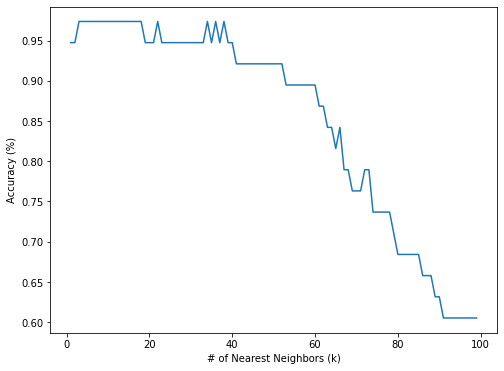

In [9]:
# Obtain accuracy score varying k from 1 to 99
accuracies = []

for k in range(1,100):
    y_test_result = knn_predict(x_train, x_test, y_train, k, p=1)
    accuracies.append(accuracy_score(y_test, y_test_result))

# Plot the results 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');